In [1]:
import matplotlib.pyplot as plt
import math
def truth_table(bits, number):
    binnum = bin(number)
    stringbinary = str(binnum)
    real_bin =  stringbinary[2:]
    real_bin = '0' * (bits**2-len(real_bin)) + real_bin
    truth_table = {}
    for i in range(0,2**bits):
        my_b = str(bin(i))[2:]
        new_b = '0' * (bits-len(my_b)) + my_b
        truth_table[new_b] = real_bin[-i-1]
    return truth_table

In [2]:
def perceptron(inputs,weights, bias):
    total = 0
    if len(weights) != len(inputs):
        return False
    for i in range(len(weights)):
        total += float(weights[i]) * float(inputs[i])
    if (total + bias) > 0:
        return 1
    else:
        return 0


In [3]:
def check(f_number, weights, bias):
    bits = len(weights)
    table = truth_table(bits, f_number)
    correct = 0
    for i in range(0,2**bits):
        my_b = str(bin(i))[2:]
        my_input = '0' * (bits - len(my_b)) + my_b
        if perceptron(weights,tuple(my_input),bias) == int(table[my_input]):
            correct += 1
    return (correct / 2 ** bits) * 100

In [4]:
def print_table(table,bits):
    string = ""
    for tup in table:
        for i in range(bits):
            string += tup[i] + " "
        string += ': ' + table[tup]
        print(string)
        string = ""

In [5]:
def dot_product(input, weights):
    tot = 0
    for i in range(len(input)):
        tot += input[i] * weights[i]
    return tot
        

In [6]:
def perceptron_learn(ts,epoch,f_number,bits):
    weights = [0] * bits
    bias = 0
    for i in range(epoch):
        for key in ts:
            predict = perceptron(weights,key,bias)
            error = int(ts[key]) - predict
            for j in range(len(weights)):
                weights[j] = weights[j] + error*int(key[j])
            bias = bias + error
    return (check(f_number,weights, bias), weights, bias)

In [7]:
perceptron_learn(truth_table(2,1),20,1,2)

(100.0, [-1, -1], 1)

In [8]:
def check_perceptron(bits):
    count = 0
    for i in range(2**(2**bits)):
        acc, weights, bias = perceptron_learn(truth_table(bits,i),50, i,bits)
        if int(acc) == 100:
            count += 1
    print_table(truth_table(bits,1),bits)
    return count
print(check_perceptron(2))

0 0 : 1
0 1 : 0
1 0 : 0
1 1 : 0
14


In [9]:
def sigmoid(val):
    return (1/(1+math.exp(-val)))

In [10]:
sigmoid(0)

0.5

In [11]:
def plot(bits, fnum):
    acc, weights, bias = perceptron_learn(truth_table(bits,fnum), 50, fnum, bits)
    blue_x = []
    blue_y = []
    green_x = []
    green_y = []
    for y in range(-200,200,1):
        for x in range(-200, 200,1):
            x_val = (x/100)
            y_val = (y/100) 
            if perceptron(weights, (x_val,y_val), bias):
                green_x.append(x_val)
                green_y.append(y_val)
            else:
                blue_x.append(x_val)
                blue_y.append(y_val)
    plt.plot(green_x, green_y, 'go')
    plt.plot(blue_x, blue_y, 'bo' )
    plt.plot([0], [0], 'ro', markersize = 5)
    plt.plot([0], [1], 'ro', markersize = 5)
    plt.plot([1], [0], 'ro', markersize = 5)
    plt.plot([1], [1], 'ro', markersize = 5)
            
            
        

In [12]:
def XOR_plot():
    #acc, weights, bias = perceptron_learn(truth_table(bits,fnum), 50, fnum, bits)
    blue_x = []
    blue_y = []
    green_x = []
    green_y = []
    weight1 = [0,1]
    weight2 = [-1,-1]
    weight3 = [-1,-1]
    bias1 = 1
    bias2 = .5
    bias3 = .5
    
    for y in range(-200,200,1):
        for x in range(-200, 200,1):
            x_val = (x/100)
            y_val = (y/100) 
            put = (perceptron(weight1, (x_val, y_val), bias1), perceptron(weight2, (x_val, y_val), bias2))
            if perceptron(weight1, (x_val,y_val), bias1):
                green_x.append(x_val)
                green_y.append(y_val)
            else:
                blue_x.append(x_val)
                blue_y.append(y_val)
    plt.plot(green_x, green_y, 'go')
    plt.plot(blue_x, blue_y, 'bo' )
    plt.plot([0], [0], 'ro', markersize = 5)
    plt.plot([0], [1], 'ro', markersize = 5)
    plt.plot([1], [0], 'ro', markersize = 5)
    plt.plot([1], [1], 'ro', markersize = 5)
            
            
        

In [50]:
def circular_plot():
    blue_x = []
    blue_y = []
    green_x = []
    green_y = []
    lightgreen_x = []
    lightgreen_y = []
    lightblue_x = []
    lightblue_y = []
    weight1 = [1,0]
    weight2 = [-1,0]
    weight3 = [0,1]
    weight4 = [0,-1]
    weight5 = [1.0001,1.0001,1.0001,1.0001]
    bias1 = 1
    bias2 = 1
    bias3 =1
    bias4 =1
    bias5 = -2.84088495
    unit_points = 0
    correct = 0
    for y in range(-150,150,1):
            for x in range(-150, 150,1):
                x_val = (x/100)
                y_val = (y/100) 
                unit_circle = (x_val)**2 + (y_val)**2
                put1 = sigmoid(dot_product((x_val, y_val),weight1) +bias1)
                put2 = sigmoid(dot_product((x_val, y_val),weight2) +bias2)
                put3 = sigmoid(dot_product((x_val, y_val),weight3) +bias3)
                put4 = sigmoid(dot_product((x_val, y_val),weight4) +bias4)
                put = (put1, put2, put3, put4)
                if perceptron(weight5,put, bias5):
                    if unit_circle <= 1:
                        correct += 1
                        unit_points += 1
                        green_x.append(x_val)
                        green_y.append(y_val)
                    else:
                        unit_points += 1
                        lightgreen_x.append(x_val)
                        lightgreen_y.append(y_val)
                else:
                    if unit_circle <= 1:
                        lightblue_x.append(x_val)
                        lightblue_y.append(y_val)
                        unit_points += 1
                    else:
                        correct += 1
                        unit_points += 1
                        blue_x.append(x_val)
                        blue_y.append(y_val)
                               
    plt.plot(green_x, green_y, 'go')
    plt.plot(blue_x, blue_y, 'bo' )
    plt.plot(lightgreen_x, lightgreen_y, 'go', color = '#49e547', markersize = .5)
    plt.plot(lightblue_x, lightblue_y, 'bo', color = '#6bafef',markersize = .5)
    #plt.plot(unit_x, unit_y, 'ro')  
    plt.axis('equal')
    plt.plot([0], [0], 'ro', markersize = 5)
    plt.plot([0], [1], 'ro', markersize = 5)
    plt.plot([1], [0], 'ro', markersize = 5)
    plt.plot([1], [1], 'ro', markersize = 5)
    print(unit_points)
    print(correct/unit_points)
    

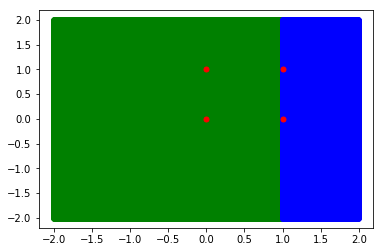

In [14]:
plot(2,6)

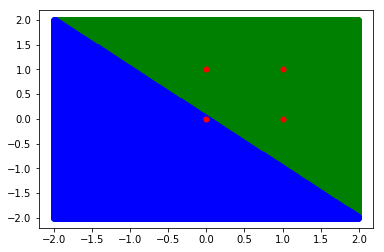

In [15]:
plot(2, 14)

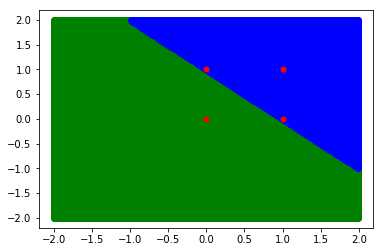

In [16]:
plot(2, 1)

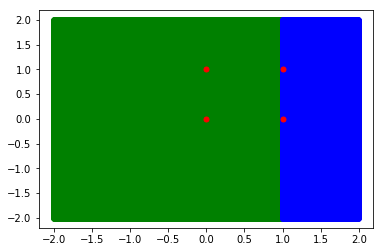

In [17]:
plot(2, 6)

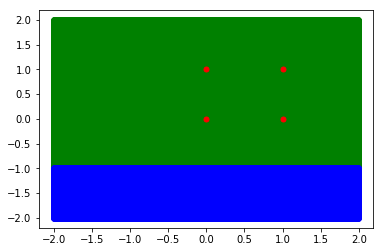

In [18]:
XOR_plot()

90000
0.9933333333333333


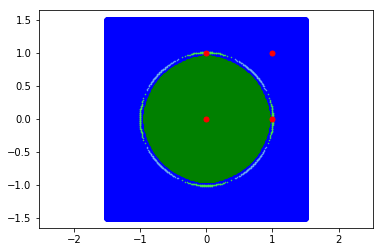

In [51]:
circular_plot()